# Top Traders Win by Selling Greed
# Bottom Traders Lose by Buying It

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options to see all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the datasets
try:
    df_sentiment = pd.read_csv("fear_greed_index.csv")
    df_trades = pd.read_csv("historical_data.csv")

    # Inspect the sentiment data
    print("--- Fear & Greed Index Data (fear_greed_index.csv) ---")
    print("Info:")
    df_sentiment.info()
    print("\nHead:")
    print(df_sentiment.head())

    # Inspect the historical trade data
    print("\n--- Historical Trader Data (historical_data.csv) ---")
    print("Info:")
    df_trades.info()
    print("\nHead:")
    print(df_trades.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure 'fear_greed_index.csv' and 'historical_data.csv' are in the same directory as your notebook.")
except Exception as e:
    print(f"An error occurred: {e}")


--- Fear & Greed Index Data (fear_greed_index.csv) ---
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Head:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

--- Historical Trader Data (historical_data.csv) ---
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
--- 

In [2]:
# --- Prepare Trader Data (df_trades) ---
# Convert 'Timestamp IST' to datetime, format is 'DD-MM-YYYY HH:MM'
# errors='coerce' will turn any un-parseable dates into NaT (Not a Time), which we can then drop
df_trades['datetime_ist'] = pd.to_datetime(df_trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop any rows that failed to parse the date
original_trade_rows = len(df_trades)
df_trades = df_trades.dropna(subset=['datetime_ist'])
print(f"Dropped {original_trade_rows - len(df_trades)} rows from trader data due to invalid date format.")

# Create 'trade_date' column by extracting just the date part
df_trades['trade_date'] = pd.to_datetime(df_trades['datetime_ist'].dt.date)


# --- Prepare Sentiment Data (df_sentiment) ---
# Convert 'date' column to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

print("\nData Preparation Complete.")
print("Trader data 'trade_date' column created:")
print(df_trades[['datetime_ist', 'trade_date']].head())
print("\nSentiment data 'date' column converted:")
print(df_sentiment[['date']].head())


Dropped 0 rows from trader data due to invalid date format.

Data Preparation Complete.
Trader data 'trade_date' column created:
         datetime_ist trade_date
0 2024-12-02 22:50:00 2024-12-02
1 2024-12-02 22:50:00 2024-12-02
2 2024-12-02 22:50:00 2024-12-02
3 2024-12-02 22:50:00 2024-12-02
4 2024-12-02 22:50:00 2024-12-02

Sentiment data 'date' column converted:
        date
0 2018-02-01
1 2018-02-02
2 2018-02-03
3 2018-02-04
4 2018-02-05


In [3]:
# Merge the two dataframes
df_merged = pd.merge(df_trades, df_sentiment, left_on='trade_date', right_on='date')

# Check if merge was successful
if df_merged.empty:
    print("Merge resulted in an empty DataFrame. This means there are no overlapping dates between the two datasets.")
    print(f"Trade data date range: {df_trades['trade_date'].min()} to {df_trades['trade_date'].max()}")
    print(f"Sentiment data date range: {df_sentiment['date'].min()} to {df_sentiment['date'].max()}")
else:
    print(f"Merge successful. {len(df_merged)} trades now have sentiment data.")
    
    # Show a sample of the merged data
    print("\nSample of Merged DataFrame (first 5 rows):")
    print(df_merged[['Account', 'Side', 'Closed PnL', 'trade_date', 'classification', 'value']].head())


Merge successful. 211218 trades now have sentiment data.

Sample of Merged DataFrame (first 5 rows):
                                      Account Side  Closed PnL trade_date  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  BUY         0.0 2024-12-02   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  BUY         0.0 2024-12-02   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  BUY         0.0 2024-12-02   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  BUY         0.0 2024-12-02   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  BUY         0.0 2024-12-02   

  classification  value  
0  Extreme Greed     80  
1  Extreme Greed     80  
2  Extreme Greed     80  
3  Extreme Greed     80  
4  Extreme Greed     80  



--- Trader Performance (PnL) by Market Sentiment ---
| classification   |        sum |   mean |    count |
|:-----------------|-----------:|-------:|---------:|
| Extreme Fear     |  739110.25 |  34.54 | 21400.00 |
| Fear             | 3357155.44 |  54.29 | 61837.00 |
| Neutral          | 1292920.68 |  34.31 | 37686.00 |
| Greed            | 2150129.27 |  42.74 | 50303.00 |
| Extreme Greed    | 2715171.31 |  67.89 | 39992.00 |


C:\Users\manoj\AppData\Local\Temp\ipykernel_9008\380899968.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_pnl = df_merged.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'count'])



Generated pnl_by_sentiment.png


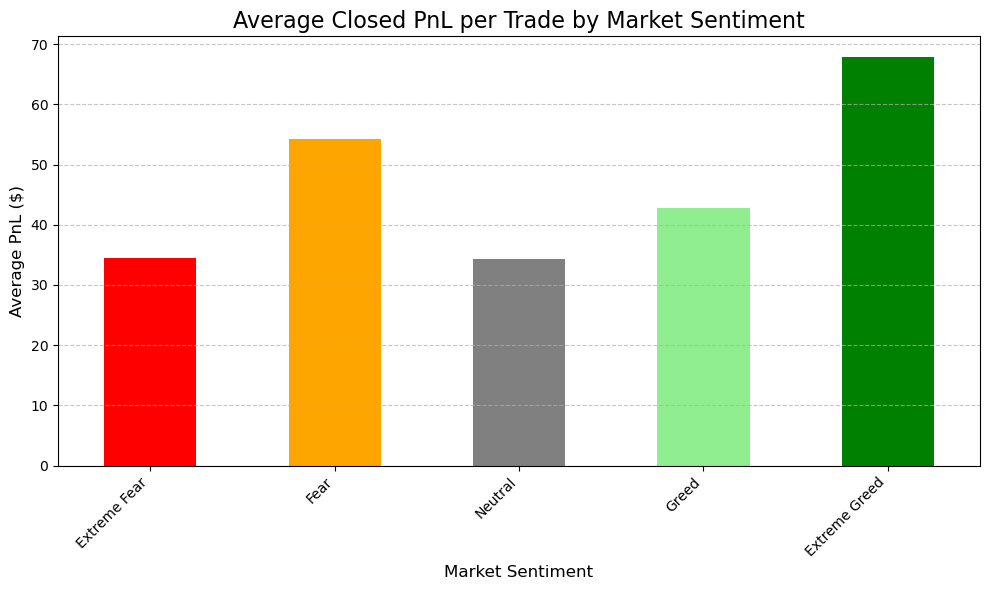


--- Trading Volume (USD) by Market Sentiment ---
| classification   |          sum |    mean |
|:-----------------|-------------:|--------:|
| Extreme Fear     | 114484261.44 | 5349.73 |
| Fear             | 483324789.79 | 7816.11 |
| Neutral          | 180242063.08 | 4782.73 |
| Greed            | 288582494.72 | 5736.88 |
| Extreme Greed    | 124465164.57 | 3112.25 |


C:\Users\manoj\AppData\Local\Temp\ipykernel_9008\380899968.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_volume = df_merged.groupby('classification')['Size USD'].agg(['sum', 'mean'])


Generated volume_by_sentiment.png


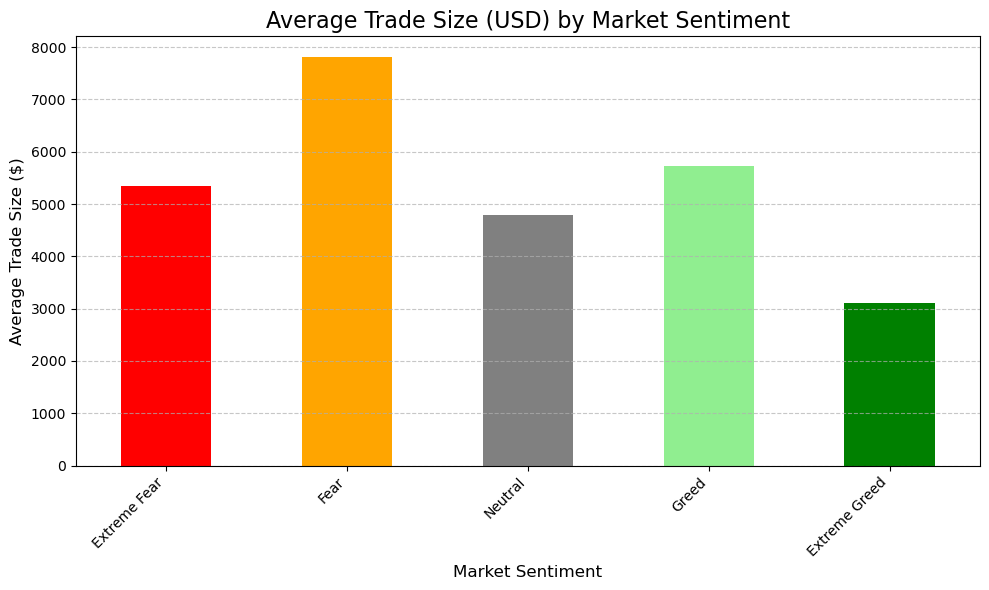

In [4]:
# Set up a consistent order for sentiment categories
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
found_sentiments = df_merged['classification'].unique()
ordered_cats = [s for s in sentiment_order if s in found_sentiments]

if ordered_cats:
    df_merged['classification'] = pd.Categorical(df_merged['classification'], categories=ordered_cats, ordered=True)

# --- 1. PnL Analysis ---
print("\n--- Trader Performance (PnL) by Market Sentiment ---")
sentiment_pnl = df_merged.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'count'])
print(sentiment_pnl.to_markdown(floatfmt=".2f"))

# --- Plot 1: Average PnL by Market Sentiment ---
plt.figure(figsize=(10, 6))
pnl_by_sentiment = sentiment_pnl['mean'].reindex(ordered_cats).dropna()
bar_colors_pnl = ['red', 'orange', 'grey', 'lightgreen', 'green']
pnl_by_sentiment.plot(kind='bar', color=bar_colors_pnl)
plt.title('Average Closed PnL per Trade by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average PnL ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pnl_by_sentiment.png')
print("\nGenerated pnl_by_sentiment.png")
plt.show()

# --- 2. Volume Analysis ---
print("\n--- Trading Volume (USD) by Market Sentiment ---")
sentiment_volume = df_merged.groupby('classification')['Size USD'].agg(['sum', 'mean'])
print(sentiment_volume.to_markdown(floatfmt=".2f"))

# --- Plot 2: Average Trade Size (USD) by Market Sentiment ---
plt.figure(figsize=(10, 6))
volume_by_sentiment = sentiment_volume['mean'].reindex(ordered_cats).dropna()
bar_colors_vol = ['red', 'orange', 'grey', 'lightgreen', 'green']
volume_by_sentiment.plot(kind='bar', color=bar_colors_vol)
plt.title('Average Trade Size (USD) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Trade Size ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('volume_by_sentiment.png')
print("Generated volume_by_sentiment.png")
plt.show()



--- PnL by Sentiment and Trade Side ---
|                           |        sum |   mean |    count |
|:--------------------------|-----------:|-------:|---------:|
| ('Extreme Fear', 'BUY')   |  373043.44 |  34.11 | 10935.00 |
| ('Extreme Fear', 'SELL')  |  366066.81 |  34.98 | 10465.00 |
| ('Fear', 'BUY')           | 1935073.44 |  63.93 | 30270.00 |
| ('Fear', 'SELL')          | 1422082.00 |  45.05 | 31567.00 |
| ('Neutral', 'BUY')        |  554415.09 |  29.23 | 18969.00 |
| ('Neutral', 'SELL')       |  738505.58 |  39.46 | 18717.00 |
| ('Greed', 'BUY')          |  614456.58 |  25.00 | 24576.00 |
| ('Greed', 'SELL')         | 1535672.69 |  59.69 | 25727.00 |
| ('Extreme Greed', 'BUY')  |  188350.75 |  10.50 | 17940.00 |
| ('Extreme Greed', 'SELL') | 2526820.56 | 114.58 | 22052.00 |


C:\Users\manoj\AppData\Local\Temp\ipykernel_9008\643408680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pnl_by_side_sentiment = df_merged.groupby(['classification', 'Side'])['Closed PnL'].agg(['sum', 'mean', 'count'])



Generated pnl_by_sentiment_side.png


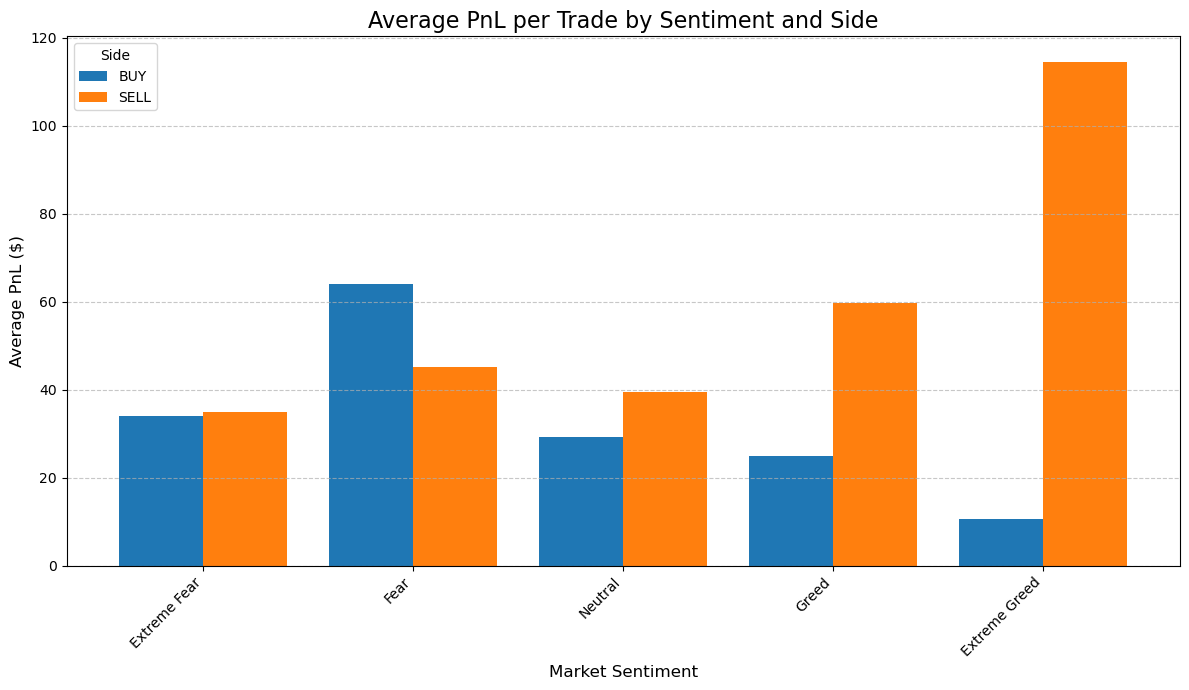

In [5]:
print("\n--- PnL by Sentiment and Trade Side ---")
pnl_by_side_sentiment = df_merged.groupby(['classification', 'Side'])['Closed PnL'].agg(['sum', 'mean', 'count'])
print(pnl_by_side_sentiment.to_markdown(floatfmt=".2f"))

# --- Plot 3: Average PnL by Sentiment and Trade Side ---
pnl_by_side_unstacked = pnl_by_side_sentiment['mean'].unstack().reindex(index=ordered_cats)

# Plotting the grouped bar chart
ax = pnl_by_side_unstacked.plot(kind='bar', figsize=(12, 7), width=0.8)

plt.title('Average PnL per Trade by Sentiment and Side', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average PnL ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Side')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pnl_by_sentiment_side.png')
print("\nGenerated pnl_by_sentiment_side.png")
plt.show()


In [6]:
# Calculate total PnL for each account
trader_pnl = df_merged.groupby('Account')['Closed PnL'].sum()

# Define top and bottom 10% thresholds
top_10_percentile = trader_pnl.quantile(0.90)
bottom_10_percentile = trader_pnl.quantile(0.10)

# Get lists of these account IDs
top_traders_accounts = trader_pnl[trader_pnl >= top_10_percentile].index
bottom_traders_accounts = trader_pnl[trader_pnl <= bottom_10_percentile].index

# --- 5. Filter DataFrames for these traders ---
df_top_traders = df_merged[df_merged['Account'].isin(top_traders_accounts)]
df_bottom_traders = df_merged[df_merged['Account'].isin(bottom_traders_accounts)]

print(f"Identified {len(top_traders_accounts)} top 10% traders (Total PnL >= ${top_10_percentile:.2f}).")
print(f"They made {len(df_top_traders)} trades.")
print(f"\nIdentified {len(bottom_traders_accounts)} bottom 10% traders (Total PnL <= ${bottom_10_percentile:.2f}).")
print(f"They made {len(df_bottom_traders)} trades.")


Identified 4 top 10% traders (Total PnL >= $839988.36).
They made 51979 trades.

Identified 4 bottom 10% traders (Total PnL <= $14501.27).
They made 12814 trades.


In [7]:
# Ensure the categorical order is set for the new dataframes
if ordered_cats:
    df_top_traders['classification'] = pd.Categorical(df_top_traders['classification'], categories=ordered_cats, ordered=True)
    df_bottom_traders['classification'] = pd.Categorical(df_bottom_traders['classification'], categories=ordered_cats, ordered=True)

# --- Analyze Top Trader Behavior ---
print("\n--- Top 10% Traders: Average PnL by Sentiment and Side ---")
top_trader_analysis = df_top_traders.groupby(['classification', 'Side'])['Closed PnL'].agg(['mean', 'count'])
print(top_trader_analysis.to_markdown(floatfmt=".2f"))

# --- Analyze Bottom Trader Behavior ---
print("\n--- Bottom 10% Traders: Average PnL by Sentiment and Side ---")
bottom_trader_analysis = df_bottom_traders.groupby(['classification', 'Side'])['Closed PnL'].agg(['mean', 'count'])
print(bottom_trader_analysis.to_markdown(floatfmt=".2f"))



--- Top 10% Traders: Average PnL by Sentiment and Side ---
|                           |   mean |    count |
|:--------------------------|-------:|---------:|
| ('Extreme Fear', 'BUY')   |  23.94 |  3300.00 |
| ('Extreme Fear', 'SELL')  | 104.06 |  2365.00 |
| ('Fear', 'BUY')           | 102.65 | 11645.00 |
| ('Fear', 'SELL')          |  86.47 | 11556.00 |
| ('Neutral', 'BUY')        |  97.99 |  5367.00 |
| ('Neutral', 'SELL')       |  83.00 |  5298.00 |
| ('Greed', 'BUY')          |  91.73 |  4713.00 |
| ('Greed', 'SELL')         | 109.97 |  4924.00 |
| ('Extreme Greed', 'BUY')  |   1.01 |   952.00 |
| ('Extreme Greed', 'SELL') | 572.38 |  1859.00 |

--- Bottom 10% Traders: Average PnL by Sentiment and Side ---
|                           |    mean |   count |
|:--------------------------|--------:|--------:|
| ('Extreme Fear', 'BUY')   |   -8.23 | 1394.00 |
| ('Extreme Fear', 'SELL')  |  -61.79 | 1493.00 |
| ('Fear', 'BUY')           |  124.25 | 1905.00 |
| ('Fear', 'SELL')         

C:\Users\manoj\AppData\Local\Temp\ipykernel_9008\2816201824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_traders['classification'] = pd.Categorical(df_top_traders['classification'], categories=ordered_cats, ordered=True)
C:\Users\manoj\AppData\Local\Temp\ipykernel_9008\2816201824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom_traders['classification'] = pd.Categorical(df_bottom_traders['classification'], categories=ordered_cats, ordered=True)
C:\Users\manoj\AppData\Local\Temp\ip